In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt


In [8]:
""" 
函数 random_batch() 用于生成随机批次数据，返回的是随机的输入和标签数据。
random_inputs 是随机的输入数据，random_labels 是随机的标签数据。
random_index  是
"""

def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])
        random_labels.append(skip_grams[i][1])
    return random_inputs, random_labels

In [9]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)
    
    def forward(self, X):
        hidden_layer = self.W(X)
        output_layer = self.WT(hidden_layer)
        return output_layer

#########
{'animal': 0, 'apple': 1, 'fruit': 2, 'banana': 3, 'orange': 4, 'cat': 5, 'monkey': 6, 'dog': 7}
LLLLLLLLLLLLLL
[[3, 1], [3, 2], [2, 3], [2, 3], [3, 2], [3, 4], [4, 3], [4, 2], [2, 4], [2, 4], [4, 2], [4, 3], [3, 4], [3, 2], [2, 3], [2, 7], [7, 2], [7, 5], [5, 7], [5, 0], [0, 5], [0, 5], [5, 0], [5, 6], [6, 5], [6, 0], [0, 6], [0, 6], [6, 0], [6, 7], [7, 6], [7, 0]]
Epoch: 1000 cost = 1.396443
Epoch: 2000 cost = 1.334986
Epoch: 3000 cost = 1.342991
Epoch: 4000 cost = 0.970078
Epoch: 5000 cost = 1.896212


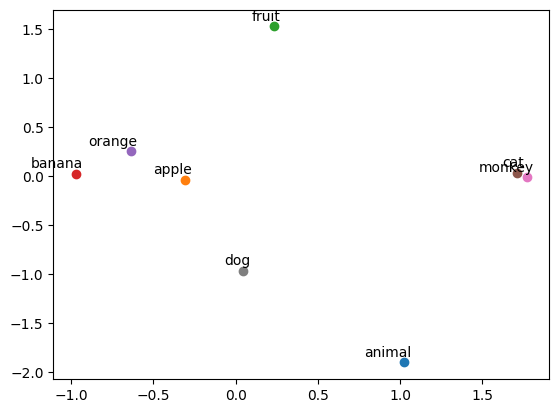

In [15]:
if __name__ == '__main__':
    batch_size = 2 # mini-batch size
    embedding_size = 2 # embedding size

    sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]

    word_sequence = " ".join(sentences).split()
    #print(word_sequence)
    word_list = " ".join(sentences).split()
    print("#########")
    #print(word_list)
    word_list = list(set(word_list)) # remove duplicate,把重复的去掉
    #print(word_list)
    word_dict = {w: i for i, w in enumerate(word_list)}
    print(word_dict)
    voc_size = len(word_list)

    # Make skip gram of one size window
    skip_grams = []
    for i in range(1, len(word_sequence) - 1):
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
        for w in context:
            skip_grams.append([target, w])
    print("LLLLLLLLLLLLLL")
    print(skip_grams)
    model = Word2Vec()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(5000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        optimizer.zero_grad()
        output = model(input_batch)

        # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
        loss = criterion(output, target_batch)
        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        loss.backward()
        optimizer.step()

    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()